# Initial Data Exploration of Google Trends insight on COVID 19 symptom search and other mental health symptoms.

### Main question: Does COVID-19 cause more people in the US to search for anxiety or depression symptoms and what locations in the US are most commonly searching for these terms?



US states.csv deaths of COVID add that dataframe in-- did that come in the same time as lots of cases and deaths?
.columns
correlate the symptoms time course wise-- do anxiety and depression have a similar time course? 4-5 symptoms 
- group the data together in a meaningful way
- another notebook explore the state-case data
-time periods, times of interest, states of interest

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [2]:
sympdaily_df = pd.read_csv('../data/open-covid-19-data/data/exports/search_trends_symptoms_dataset/United States of America/2020_US_daily_symptoms_dataset.csv')

This aggregated, anonymized dataset shows trends in search patterns for symptoms and is intended to help researchers to better understand the impact of COVID-19.
Public health experts indicated that trends in search patterns might be helpful in broadly understanding how COVID-19 impacts communities and even in detecting outbreaks earlier. You shouldn’t assume that the data is a recording of real-world clinical events, or use this data for medical diagnostic, prognostic, or treatment purposes.

https://storage.googleapis.com/gcp-public-data-symptom-search/COVID-19%20Search%20Trends%20symptoms%20dataset%20documentation%20.pdf

In [3]:
sympdaily_df.shape

(14943, 430)

In [4]:
sympdaily_df

,open_covid_region_code,country_region_code,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,date,symptom:Abdominal obesity,symptom:Abdominal pain,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-01,2.12,5.07,...,1.77,NaN,NaN,3.75,NaN,3.16,NaN,NaN,0.81,NaN
1,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-02,2.53,5.52,...,1.25,NaN,NaN,4.04,NaN,3.01,NaN,NaN,NaN,NaN
2,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-03,2.30,5.32,...,1.78,NaN,NaN,3.95,NaN,2.91,NaN,NaN,0.87,NaN
3,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-04,1.91,4.96,...,1.25,NaN,NaN,3.44,NaN,4.07,NaN,NaN,NaN,0.82
4,US-AK,US,United States,Alaska,US-AK,NaN,NaN,2020-01-05,2.41,4.79,...,1.43,NaN,NaN,3.59,NaN,4.26,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14938,US-WY,US,United States,Wyoming,US-WY,NaN,NaN,2020-10-15,1.62,3.33,...,0.92,NaN,NaN,2.61,NaN,1.67,NaN,NaN,NaN,NaN
14939,US-WY,US,United States,Wyoming,US-WY,NaN,NaN,2020-10-16,0.97,3.42,...,0.81,NaN,NaN,1.89,NaN,1.49,NaN,NaN,NaN,NaN
14940,US-WY,US,United States,Wyoming,US-WY,NaN,NaN,2020-10-17,1.30,3.74,...,1.13,NaN,NaN,2.07,NaN,2.14,NaN,NaN,NaN,0.60
14941,US-WY,US,United States,Wyoming,US-WY,NaN,NaN,2020-10-18,1.63,3.73,...,1.20,NaN,NaN,2.03,NaN,2.05,NaN,NaN,1.58,NaN


In [5]:
#select the columns of 'anxiety' 'depression' and other COVID 19 symptoms for comparison
sympdaily_df.drop(sympdaily_df.columns.difference(['date', 'sub_region_1_code', 'symptom:Cough', 'symptom:Nausea', 'symptom:Fever','symptom:Anxiety','symptom:Generalized anxiety disorder','symptom:Depression']), 1, inplace=True)

In [6]:
sympdaily_df

,sub_region_1_code,date,symptom:Anxiety,symptom:Cough,symptom:Depression,symptom:Fever,symptom:Generalized anxiety disorder,symptom:Nausea
0,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75
1,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40
2,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84
3,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55
4,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96
...,...,...,...,...,...,...,...,...
14938,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73
14939,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52
14940,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57
14941,US-WY,2020-10-18,6.15,3.85,4.11,3.31,0.94,1.70


In [7]:
#rename columns to be more readable
col_map = { 'sub_region_1_code': 'state',
          'symptom:Anxiety': 'anxiety',
          'symptom:Cough': 'cough',
          'symptom:Nausea':'nausea',
          'symptom:Fever': 'fever',
          'symptom:Generalized anxiety disorder': 'generalized_anxiety_disorder',
          'symptom:Depression': 'depression'}

In [8]:
sympdaily_df = sympdaily_df.rename(columns=col_map)

In [9]:
sympdaily_df

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea
0,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75
1,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40
2,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84
3,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55
4,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96
...,...,...,...,...,...,...,...,...
14938,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73
14939,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52
14940,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57
14941,US-WY,2020-10-18,6.15,3.85,4.11,3.31,0.94,1.70


In [10]:
#rename 'state' column to be more readable
state2abbv = {
 'US-AL': 'AL',
 'US-AK': 'AK',
 'US-AZ': 'AZ',
 'US-CA': 'CA',
 'US-CO': 'CO',
 'US-CT': 'CT',
 'US-DC': 'DC',
 'US-DE': 'DE',
 'US-FL': 'FL',
 'US-GA': 'GA',
 'US-HI': 'HI',
 'US-IA': 'IA',
 'US-ID': 'ID',
 'US-IL': 'IL',
 'US-IN': 'IN',
 'US-KS': 'KS',
 'US-KY': 'KY',
 'US-LA': 'LA',
 'US-MA': 'MA',
 'US-MD': 'MD',
 'US-ME': 'ME',
 'US-MI': 'MI',
 'US-MN': 'MN',
 'US-MO': 'MO',
 'US-MS': 'MS',
 'US-MT': 'MT',
 'US-NC': 'NC',
 'US-ND': 'ND',
 'US-NE': 'NE',
 'US-NH': 'NH',
 'US-NJ': 'NJ',
 'US-NM': 'NM',
 'US-NV': 'NV',
 'US-NY': 'NY',
 'US-OH': 'OH',
 'US-OK': 'OK',
 'US-OR': 'OR',
 'US-PA': 'PA',
 'US-RI': 'RI',
 'US-SC': 'SC',
 'US-SD': 'SD',
 'US-TN': 'TN',
 'US-TX': 'TX',
 'US-UT': 'UT',
 'US-VA': 'VA',
 'US-VT': 'VT',
 'US-WA': 'WA',
 'US-WI': 'WI',
 'US-WV': 'WV',
 'US-WY': 'WY'}

In [11]:
sympdaily_df['stateabbv'] = sympdaily_df['state'].map(state2abbv)

In [12]:
sympdaily_df

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,stateabbv
0,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,AK
1,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,AK
2,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,AK
3,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,AK
4,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,AK
...,...,...,...,...,...,...,...,...,...
14938,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,WY
14939,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,WY
14940,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,WY
14941,US-WY,2020-10-18,6.15,3.85,4.11,3.31,0.94,1.70,WY


In [13]:
#index by state
sympdaily_df.set_index('stateabbv', inplace= True)

In [14]:
sympdaily_df

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea
stateabbv,,,,,,,,
AK,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75
AK,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40
AK,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84
AK,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55
AK,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96
...,...,...,...,...,...,...,...,...
WY,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73
WY,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52
WY,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57


In [15]:
#upload more information about states including full name, 'code', region and division
url = 'https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv'
state_df = pd.read_csv(url)

In [16]:
state_df

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific
5,Colorado,CO,West,Mountain
6,Connecticut,CT,Northeast,New England
7,District of Columbia,DC,South,South Atlantic
8,Delaware,DE,South,South Atlantic
9,Florida,FL,South,South Atlantic


In [17]:
sympdaily_df2=sympdaily_df.merge(state_df, left_index=True, right_on='State Code')

In [18]:
sympdaily_df2

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
0,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,Alaska,AK,West,Pacific
0,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,Alaska,AK,West,Pacific
0,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,Alaska,AK,West,Pacific
0,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,Alaska,AK,West,Pacific
0,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,Alaska,AK,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...
50,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,Wyoming,WY,West,Mountain
50,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,Wyoming,WY,West,Mountain
50,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,Wyoming,WY,West,Mountain
50,US-WY,2020-10-18,6.15,3.85,4.11,3.31,0.94,1.70,Wyoming,WY,West,Mountain


## Save dataset now that it is cleaned to new csv 

In [19]:
sympdaily_df2.to_csv('../data/clean/symptoms_clean.csv', index=False)

### Initial data exploration now that the data is cleaned
* Shape
* Column names
* First few rows
* Last few rows

In [20]:
sympdaily_df2.shape

(14650, 12)

In [21]:
sympdaily_df2.columns

Index(['state', 'date', 'anxiety', 'cough', 'depression', 'fever',
       'generalized_anxiety_disorder', 'nausea', 'State', 'State Code',
       'Region', 'Division'],
      dtype='object')

In [22]:
sympdaily_df2.head()

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
0,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,Alaska,AK,West,Pacific
0,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,Alaska,AK,West,Pacific
0,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,Alaska,AK,West,Pacific
0,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,Alaska,AK,West,Pacific
0,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,Alaska,AK,West,Pacific


In [23]:
sympdaily_df2.tail()

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
50,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,Wyoming,WY,West,Mountain
50,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,Wyoming,WY,West,Mountain
50,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,Wyoming,WY,West,Mountain
50,US-WY,2020-10-18,6.15,3.85,4.11,3.31,0.94,1.70,Wyoming,WY,West,Mountain
50,US-WY,2020-10-19,7.56,4.13,4.79,4.57,1.07,1.70,Wyoming,WY,West,Mountain


In [24]:
sympdaily_df2['depression'].value_counts()

4.20    118
4.33    115
4.21    111
4.18    110
4.00    109
       ... 
6.25      1
5.88      1
6.69      1
2.09      1
6.53      1
Name: depression, Length: 453, dtype: int64

## Lets take a look at the data on specific dates
* Index the dataframe by dates
* Use the dates and look at monthly searches per state

In [25]:
sympdaily_df2.index= pd.DatetimeIndex(sympdaily_df2['date'])

In [26]:
sympdaily_df2

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
date,,,,,,,,,,,,
2020-01-01,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,Alaska,AK,West,Pacific
2020-01-02,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,Alaska,AK,West,Pacific
2020-01-03,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,Alaska,AK,West,Pacific
2020-01-04,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,Alaska,AK,West,Pacific
2020-01-05,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,Alaska,AK,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,Wyoming,WY,West,Mountain
2020-10-16,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,Wyoming,WY,West,Mountain
2020-10-17,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,Wyoming,WY,West,Mountain


In [27]:
# look at specific dates in March 
sympdaily_df2.loc['2020-03']

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,State Code,Region,Division
date,,,,,,,,,,,,
2020-03-01,US-AK,2020-03-01,8.18,8.62,4.99,6.21,NaN,1.98,Alaska,AK,West,Pacific
2020-03-02,US-AK,2020-03-02,8.64,9.65,5.80,5.86,1.11,2.69,Alaska,AK,West,Pacific
2020-03-03,US-AK,2020-03-03,8.80,9.96,5.80,6.52,1.21,2.65,Alaska,AK,West,Pacific
2020-03-04,US-AK,2020-03-04,8.85,10.44,5.67,6.22,1.09,2.49,Alaska,AK,West,Pacific
2020-03-05,US-AK,2020-03-05,8.37,8.87,5.70,5.47,1.12,2.41,Alaska,AK,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-27,US-WY,2020-03-27,5.60,7.80,3.18,9.00,0.73,1.39,Wyoming,WY,West,Mountain
2020-03-28,US-WY,2020-03-28,5.69,8.04,3.04,8.77,0.91,1.65,Wyoming,WY,West,Mountain
2020-03-29,US-WY,2020-03-29,6.17,7.21,3.11,7.01,0.72,1.41,Wyoming,WY,West,Mountain


In [28]:
#this call groups states by month over month from January to October 2020
bymonthly_state = sympdaily_df2.groupby('State Code').resample('M').mean()

In [29]:
bymonthly_state

anxiety      cough  depression      fever  \
State Code date                                                     
AK         2020-01-31  8.724194   8.502258    5.830968   5.273871   
           2020-02-29  8.955862   8.047931    5.928276   5.308621   
           2020-03-31  8.012258  11.142581    4.332903  11.425806   
           2020-04-30  7.692667   4.767333    4.623667   5.819333   
           2020-05-31  7.237419   3.111935    4.754516   4.327742   
...                         ...        ...         ...        ...   
WY         2020-06-30  5.885333   2.394000    3.784000   3.158333   
           2020-07-31  5.958065   2.614839    3.855806   3.611290   
           2020-08-31  6.013871   2.603548    3.677419   3.198387   
           2020-09-30  6.410667   3.349667    4.010000   3.605333   
           2020-10-31  6.538421   3.715789    4.187368   3.810526   

                       generalized_anxiety_disorder    nausea  
State Code date                                                
AK         2020-01-31                      1.291667  2.636452  
           2020-02-29                      1.192857  2.566207  
           2020-03-31                      1.028214  2.178387  
           2020-04-30                      0.954828  2.038333  
           2020-05-31                      0.968929  1.884194  
...                                             ...       ...  
WY         2020-06-30                      0.897333  1.697333  
           2020-07-31                      0.884333  1.753548  
           2020-08-31                      0.819333  1.720645  
           2020-09-30                      0.879333  1.646667  
           2020-10-31                      0.960000  1.708421  

[500 rows x 6 columns]

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='State Code,date'>

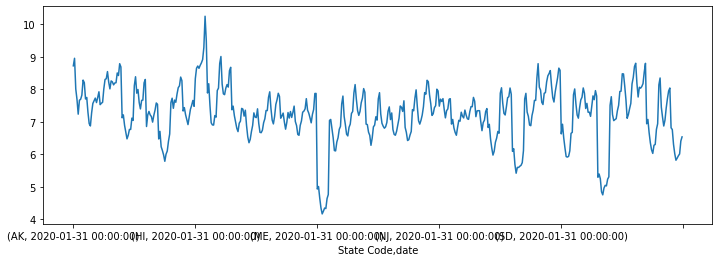

In [30]:
#Graph these state 'anxiety' search averages over months from January to October 2020
bymonthly_state['anxiety'].plot(figsize=(12,4))

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='State Code,date'>

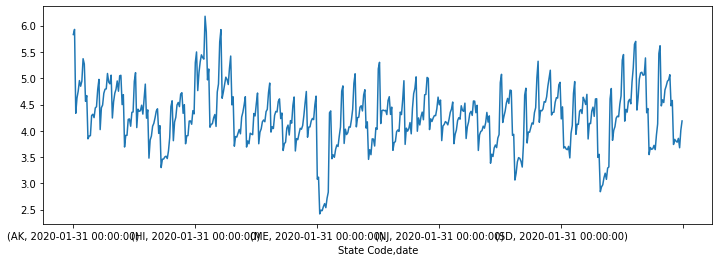

In [31]:
#Graph these state 'depression' search averages over months from January to October 2020

bymonthly_state['depression'].plot(figsize=(12,4))

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='State Code,date'>

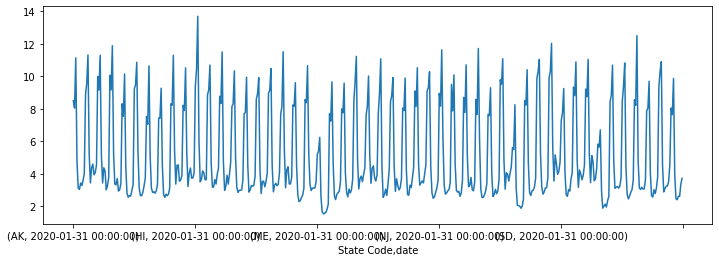

In [32]:
#Graph these state 'cough' search averages over months from January to October 2020
bymonthly_state['cough'].plot(figsize=(12,4))

### Observations
* These graphs are all pretty random, not sure if they'll make a good story, will forgo adding these in my final presentation

# Lets take a look at ranking of means for each symptom search per state

In [33]:
#Anxiety search mean ranking 

#groupby function to see how states average the search for 'anxiety'
stateanxiety_mean = sympdaily_df2.groupby('State Code')['anxiety'].mean()

In [34]:
stateanxiety_mean.sort_values(ascending=False)

State Code
HI    8.963242
CA    8.331775
ID    8.299386
WA    8.294539
SC    8.202696
RI    8.057338
AK    8.017782
AZ    7.969898
CT    7.902526
FL    7.850819
VT    7.835802
NH    7.713276
OK    7.677065
MO    7.674812
TN    7.640819
WV    7.594027
TX    7.536519
NJ    7.510102
KY    7.501399
NE    7.444061
IA    7.443720
AL    7.432014
VA    7.422833
MD    7.400717
PA    7.358225
NV    7.338464
GA    7.310034
DC    7.233106
MT    7.196382
NY    7.157645
IL    7.122184
LA    7.117611
MN    7.084232
MA    7.028771
KS    7.020478
NC    6.979283
NM    6.936041
ND    6.917304
IN    6.866724
CO    6.859488
MS    6.774983
MI    6.605836
WI    6.533754
OH    6.464573
SD    6.333379
WY    6.241024
DE    6.228396
OR    5.759488
UT    5.105529
ME    4.536860
Name: anxiety, dtype: float64

In [35]:
#Depression search mean ranking 

#groupby function to see how states average the search for 'depression'
statedepression_mean = sympdaily_df2.groupby('State Code')['depression'].mean()

#rank highest to lowest mean
statedepression_mean.sort_values(ascending=False)

State Code
HI    5.403208
ID    5.118567
WA    5.094471
AK    5.073652
WV    4.920614
CA    4.793481
VT    4.732116
AZ    4.691980
SC    4.662730
RI    4.614198
OK    4.591160
MT    4.563072
CT    4.539488
MO    4.520648
IA    4.453003
NE    4.425085
NH    4.421297
TN    4.404744
FL    4.403823
KY    4.379829
TX    4.350341
VA    4.311297
NV    4.299556
MD    4.292014
AL    4.253038
ND    4.237850
KS    4.222218
PA    4.221570
NM    4.210068
NJ    4.203959
MN    4.194061
CO    4.184539
GA    4.150990
IL    4.102969
DC    4.096928
NY    4.089113
MA    4.072662
IN    4.070341
NC    4.048464
LA    4.007816
WY    3.983959
WI    3.858464
SD    3.845222
MS    3.824505
MI    3.815290
OH    3.768737
DE    3.612560
OR    3.483481
UT    3.170171
ME    2.676826
Name: depression, dtype: float64

In [36]:
#Cough search mean ranking

#groupby function to see how states average the search for 'cough'
statecough_mean = sympdaily_df2.groupby('State Code')['cough'].mean()

#rank highest to lowest mean
statecough_mean.sort_values(ascending=False)

State Code
SC    6.454027
HI    6.319010
AL    6.043549
TX    5.971980
OK    5.876962
AZ    5.836109
TN    5.780068
FL    5.738225
MO    5.714846
CA    5.695427
WV    5.588908
ID    5.584232
RI    5.579488
LA    5.575734
GA    5.557611
IA    5.548498
NE    5.493857
MS    5.488601
NJ    5.392628
WA    5.383891
KY    5.381638
CT    5.370614
AK    5.339898
VA    5.283242
KS    5.270444
MD    5.261229
NV    5.256553
NY    5.194812
NC    5.181229
NH    5.106416
MT    5.105836
VT    5.088259
IL    5.085495
PA    5.060922
NM    5.038328
ND    5.028976
IN    4.982082
DC    4.883345
WI    4.791638
CO    4.782287
MN    4.774881
SD    4.767509
WY    4.698225
MI    4.669249
MA    4.666553
OH    4.659317
DE    4.560751
OR    3.530205
UT    3.428328
ME    2.996451
Name: cough, dtype: float64

In [37]:
#Fever search mean ranking 

#groupby function to see how states average the search for 'fever'
statefever_mean = sympdaily_df2.groupby('State Code')['fever'].mean()

#rank highest to lowest mean
statefever_mean.sort_values(ascending=False)

State Code
HI    6.153345
AZ    5.602730
CA    5.550648
IA    5.509625
SC    5.465119
ID    5.437850
WA    5.389829
FL    5.380444
OK    5.376382
CT    5.349010
TX    5.343003
MO    5.331160
NJ    5.313823
AK    5.280478
VT    5.277918
NE    5.242389
NY    5.227235
DC    5.168737
RI    5.155563
TN    5.108874
NH    5.063174
KS    5.033481
WV    5.028703
AL    4.988874
MD    4.961126
MT    4.927338
KY    4.916109
IL    4.899966
GA    4.874027
NV    4.845836
VA    4.831536
ND    4.828874
LA    4.807474
PA    4.755597
MN    4.704710
MA    4.626143
IN    4.610819
CO    4.602833
WY    4.545051
WI    4.542184
SD    4.541945
NM    4.534983
OH    4.521502
MS    4.511911
NC    4.507235
MI    4.454403
DE    4.195085
OR    3.409488
UT    3.397611
ME    2.847611
Name: fever, dtype: float64

## Observations on mean search by state

* Hawaii California, Washington and South Carolina  had the highest 'anxiety' mean search
* Hawaii, Idaho, Washington, and Alaska had the highest 'depression' mean search    
* South Carolina, Hawaii, Alabama,  and Texas had the highest 'cough' mean searches
* Hawaii, Arizona, California and Iowa had the highest 'fever' mean search

## Reset the index so that we can use data to see more date comparisons

In [38]:
sympdaily_df2.set_index('State Code', inplace = True)

In [39]:
sympdaily_df2

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,Region,Division
State Code,,,,,,,,,,,
AK,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,Alaska,West,Pacific
AK,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,Alaska,West,Pacific
AK,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,Alaska,West,Pacific
AK,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,Alaska,West,Pacific
AK,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,Alaska,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...
WY,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,Wyoming,West,Mountain
WY,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,Wyoming,West,Mountain
WY,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,Wyoming,West,Mountain


In [40]:
#take the NATIONAL by day average for searching 'anxiety'

national_byday = sympdaily_df2.groupby('date')[['anxiety', 'fever', 'depression']].mean()
national_byday

,anxiety,fever,depression
date,,,
2020-01-01,6.9054,4.5284,4.4970
2020-01-02,7.4624,4.6304,4.5464
2020-01-03,7.0736,4.5204,4.2120
2020-01-04,6.7426,4.5078,4.1634
2020-01-05,7.1342,4.4554,4.4074
...,...,...,...
2020-10-15,7.9406,3.6686,4.6984
2020-10-16,7.2072,3.4772,4.3144
2020-10-17,6.5428,3.3180,3.9258


/usr/local/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='date'>

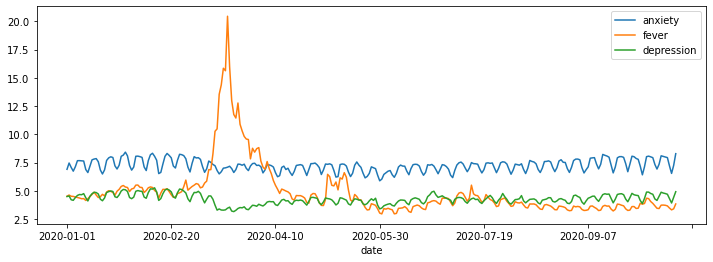

In [41]:
#plot gives time course

national_byday.plot(figsize=(12,4))

In [42]:
national_byday.corr()

,anxiety,fever,depression
anxiety,1.000000,-0.008752,0.783481
fever,-0.008752,1.000000,-0.396821
depression,0.783481,-0.396821,1.000000


### Observations
* Not much of a correlation between symptom search, but still and interesting relationship
* The national graph plot is interesting, will include in final presentation

## Explore regional symptom popularity
* Create a dictionary to plot colors to different regions
* Plot different region mean search popularity

In [43]:
region2col = {
    'West': 'blue',
    'Midwest': 'yellow',
    'South': 'pink',
    'Northeast': 'green'
}

In [44]:
sympdaily_df2['Region'].map(region2col)

State Code
AK    blue
AK    blue
AK    blue
AK    blue
AK    blue
      ... 
WY    blue
WY    blue
WY    blue
WY    blue
WY    blue
Name: Region, Length: 14650, dtype: object

In [45]:
regionanxiety = sympdaily_df2.groupby('Region')['anxiety'].mean()

Text(0, 0.5, 'anxiety mean')

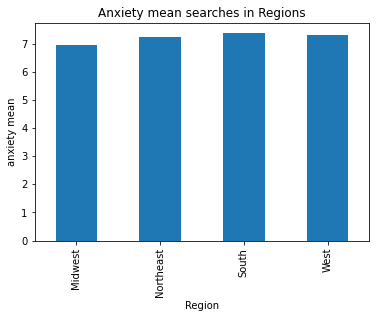

In [46]:
regionanxiety.plot(kind='bar', 
                 legend=False
                )

plt.title('Anxiety mean searches in Regions')
plt.xlabel('Region')
plt.ylabel('anxiety mean')

# In this part of the notebook, we will look at the following ways of using data in a story:

    * 1. Measurement
    
    * 2. Internal Comparison
    

In [47]:
sympdaily_df2

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,Region,Division
State Code,,,,,,,,,,,
AK,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,Alaska,West,Pacific
AK,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,Alaska,West,Pacific
AK,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,Alaska,West,Pacific
AK,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,Alaska,West,Pacific
AK,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,Alaska,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...
WY,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,Wyoming,West,Mountain
WY,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,Wyoming,West,Mountain
WY,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,Wyoming,West,Mountain


### 1. Measurement 

#### Q1. On what dates were the mean for searches for 'anxiety' 'depression' 'cough' and 'fever'  greater than  5?

* Steps:
    1. create filters on the `sympdaily_df2` data frame to find rows with:
        * `symptoms_bystate` value greater than 5
        * `depression_bydate` value greater than 5
        * `cough_bydate` value greater than 5
        * `fever_bydate` value greater than 5
    2. create a subset of the data frame called `depression_and_cough` with just these rows
    3. count the number of rows

In [48]:
# 1. create filters

#re-index to make states grouped by monthly dates
sympdaily_df2.index= pd.DatetimeIndex(sympdaily_df2['date'])

#create filters for different symptoms if the mean 
symptoms_bystate = sympdaily_df2.groupby('State').resample('M').mean()>5
depression_bydate = sympdaily_df2.groupby('depression').resample('M').mean()>5
cough_bydate = sympdaily_df2.groupby('cough').resample('M').mean()>5
fever_bydate = sympdaily_df2.groupby('fever').resample('M').mean()>5

In [49]:
#list dates where "True"

In [50]:
symptoms_bystate.head()

anxiety  cough  depression  fever  \
State   date                                            
Alabama 2020-01-31     True   True       False  False   
        2020-02-29     True   True       False   True   
        2020-03-31     True   True       False   True   
        2020-04-30     True   True       False   True   
        2020-05-31     True  False       False  False   

                    generalized_anxiety_disorder  nausea  
State   date                                              
Alabama 2020-01-31                         False   False  
        2020-02-29                         False   False  
        2020-03-31                         False   False  
        2020-04-30                         False   False  
        2020-05-31                         False   False

In [51]:
depression_bydate.head()

,,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea
depression,date,,,,,,
1.80,2020-03-31,False,True,False,True,False,False
1.88,2020-03-31,False,True,False,True,False,False
1.91,2020-03-31,False,True,False,True,False,False
1.97,2020-03-31,False,True,False,True,False,False
1.98,2020-03-31,False,False,False,True,False,False


In [52]:
fever_bydate.head()

,,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea
fever,date,,,,,,
1.60,2020-06-30,False,False,False,False,False,False
1.63,2020-06-30,False,False,False,False,False,False
1.66,2020-08-31,False,False,False,False,False,False
1.67,2020-05-31,False,False,False,False,False,False
1.68,2020-06-30,False,False,False,False,False,False


In [53]:
cough_bydate.head()

,,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea
cough,date,,,,,,
1.29,2020-06-30,False,False,False,False,False,False
1.30,2020-06-30,False,False,False,False,False,False
1.32,2020-06-30,False,False,False,False,False,False
1.34,2020-05-31,False,False,False,False,False,False
1.35,2020-06-30,False,False,False,False,False,False


## 2. Internal Comparison

#### Q2. What was the mean of the overall search for 'anxiety' compared to 'cough' in Alabama, California, New York? 

* Steps:
    1. find the rows that pertain to `Alabama,' 'California' and 'New York'
    2. get the value from the `anxiety` column for those rows
    3. get the values from the 'cough' column for those rows
    4. compare the states by graphing

In [54]:
sympdaily_df2

,state,date,anxiety,cough,depression,fever,generalized_anxiety_disorder,nausea,State,Region,Division
date,,,,,,,,,,,
2020-01-01,US-AK,2020-01-01,8.13,9.64,5.58,5.95,1.06,2.75,Alaska,West,Pacific
2020-01-02,US-AK,2020-01-02,9.21,10.41,6.74,6.33,1.58,3.40,Alaska,West,Pacific
2020-01-03,US-AK,2020-01-03,8.31,9.58,5.21,5.66,1.11,2.84,Alaska,West,Pacific
2020-01-04,US-AK,2020-01-04,7.87,9.53,5.32,4.91,1.07,2.55,Alaska,West,Pacific
2020-01-05,US-AK,2020-01-05,7.75,9.58,5.50,4.90,0.89,2.96,Alaska,West,Pacific
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-15,US-WY,2020-10-15,7.35,3.60,4.32,3.52,1.09,1.73,Wyoming,West,Mountain
2020-10-16,US-WY,2020-10-16,6.10,3.85,3.99,3.92,0.74,1.52,Wyoming,West,Mountain
2020-10-17,US-WY,2020-10-17,6.04,3.74,3.89,3.27,1.06,1.57,Wyoming,West,Mountain


In [55]:
#find 'anxiety' search mean for Alabama, California and New York
alabama_anxiety = sympdaily_df2[sympdaily_df2['State']=='Alabama']['anxiety'].mean()
alabama_anxiety

7.432013651877136

In [56]:
california_anxiety = sympdaily_df2[sympdaily_df2['State']=='California']['anxiety'].mean()
california_anxiety

8.331774744027303

In [57]:
newyork_anxiety = sympdaily_df2[sympdaily_df2['State']=='New York']['anxiety'].mean()
newyork_anxiety

7.157645051194541

In [58]:
# find 'cough' search mean for Alabama, California and New York
alabama_cough = sympdaily_df2[sympdaily_df2['State']=='Alabama']['cough'].mean()
alabama_cough

6.04354948805461

In [59]:
california_cough = sympdaily_df2[sympdaily_df2['State']=='California']['cough'].mean()
california_cough

5.695426621160412

In [60]:
newyork_cough = sympdaily_df2[sympdaily_df2['State']=='New York']['cough'].mean()
newyork_cough

5.194812286689416

### Graph specific state symptom search over time

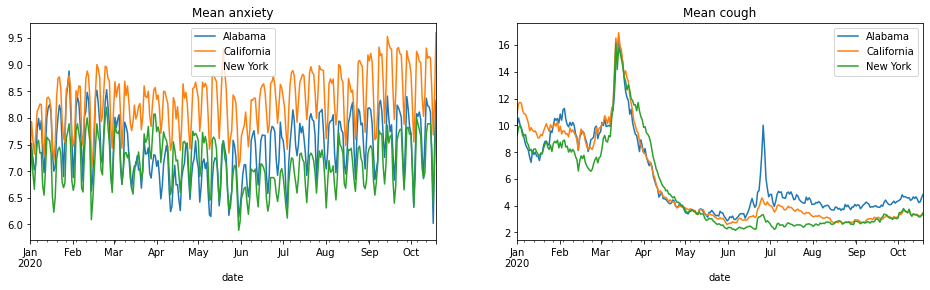

In [61]:
states_to_use = ['New York', 'California', 'Alabama']
state_filter = sympdaily_df2['State'].isin(states_to_use)
fig,ax=plt.subplots(1,2, figsize=(16,4))
ts_plot=sympdaily_df2[state_filter].groupby('State')['anxiety'].plot(ax=ax[0], 
                                                              legend=True,
                                                             title="Mean anxiety")


ts_plot2=sympdaily_df2[state_filter].groupby('State')['cough'].plot(ax=ax[1], 
                                                              legend=True,
                                                             title="Mean cough")